### Numpy array vs Python lists

In [3]:
#speed

#list

a = [i for i in range(10000000)]

b = [i for i in range(10000000)]

c = []

import time

start = time.time()

for i in range(len(a)):

  c.append(a[i]+b[i])

print(time.time()-start)

1.0828626155853271


In [4]:
import numpy as np

a = np.arange(10000000)
b = np.arange(10000000,20000000)

start = time.time()

a+b

print(time.time()-start)

0.020594120025634766


In [ ]:
1.5219941139221191 / 0.04700922966003418

32.376495529261405

In [ ]:
# memory

a = [i for i in range(10000000)]

import sys

sys.getsizeof(a)

89095160

In [ ]:
a = np.arange(10000000,dtype='int32')

b = np.arange(10000000,dtype='int8')

sys.getsizeof(a)
sys.getsizeof(b)

10000112

In [ ]:
#convenience

#Advance Indexing

In [ ]:
#normal indexing and slicing

a = np.arange(24).reshape(6,4)

a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [ ]:
a[1:,2:]

array([[ 6,  7],
       [10, 11],
       [14, 15],
       [18, 19],
       [22, 23]])

In [ ]:
a[1:3,2:4]

array([[ 6,  7],
       [10, 11]])

In [ ]:
#Fancy Indexing

a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [ ]:
a[[1,3,4]]

array([[ 4,  5,  6,  7],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [ ]:
a[:,[1,3]]

array([[ 1,  3],
       [ 5,  7],
       [ 9, 11],
       [13, 15],
       [17, 19],
       [21, 23]])

In [ ]:
#Boolean Indexing

a = np.random.randint(1,100,24).reshape(6,4)

a

array([[83, 33,  3, 26],
       [92, 18, 82,  8],
       [ 8, 34, 91, 78],
       [81, 46, 87, 84],
       [87, 48, 50, 50],
       [64, 57, 24, 79]])

In [ ]:
np.random.randint(1,100,10)

array([51, 54, 99, 28, 89, 29, 14, 73, 96, 18])

In [ ]:
a

array([[83, 33,  3, 26],
       [92, 18, 82,  8],
       [ 8, 34, 91, 78],
       [81, 46, 87, 84],
       [87, 48, 50, 50],
       [64, 57, 24, 79]])

In [ ]:
# find all number greater than 50

a[a>50]

array([83, 92, 82, 91, 78, 81, 87, 84, 87, 64, 57, 79])

In [ ]:
a>50

array([[ True, False, False, False],
       [ True, False,  True, False],
       [False, False,  True,  True],
       [ True, False,  True,  True],
       [ True, False, False, False],
       [ True,  True, False,  True]])

In [ ]:
# find all numbers divisible by 2

a[a % 2 == 0]

array([26, 92, 18, 82,  8,  8, 34, 78, 46, 84, 48, 50, 50, 64, 24])

In [ ]:
#find all numbers greater than 50 and divisible by 2

a[( a > 50 ) & (a % 2 == 0)]


array([92, 82, 78, 84, 64])

In [ ]:
# find all numbers not divisible by 7

a[~(a / 7 == 0)]

array([83, 33,  3, 26, 92, 18, 82,  8,  8, 34, 91, 78, 81, 46, 87, 84, 87,
       48, 50, 50, 64, 57, 24, 79])

### Broadcasting

The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations.

The smaller array is “broadcast” across the larger array so that they have compatible shapes.

In [ ]:
# same shape

a = np.arange(6).reshape(2,3)

b = np.arange(6,12).reshape(2,3)

print(a)

print(b)

[[0 1 2]
 [3 4 5]]
[[ 6  7  8]
 [ 9 10 11]]


In [ ]:
a + b

array([[ 6,  8, 10],
       [12, 14, 16]])

In [ ]:
# diff shape

a = np.arange(6).reshape(2,3)
b = np.arange(3).reshape(1,3)

print(a)

print(b)

a + b

[[0 1 2]
 [3 4 5]]
[[0 1 2]]


array([[0, 2, 4],
       [3, 5, 7]])

#### Broadcasting Rules

**1. Make the two arrays have the same number of dimensions.**<br>
- If the numbers of dimensions of the two arrays are different, add new dimensions with size 1 to the head of the array with the smaller dimension.<br>

**2. Make each dimension of the two arrays the same size.**<br>
- If the sizes of each dimension of the two arrays do not match, dimensions with size 1 are stretched to the size of the other array.
- If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised.

<img src = "https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png">

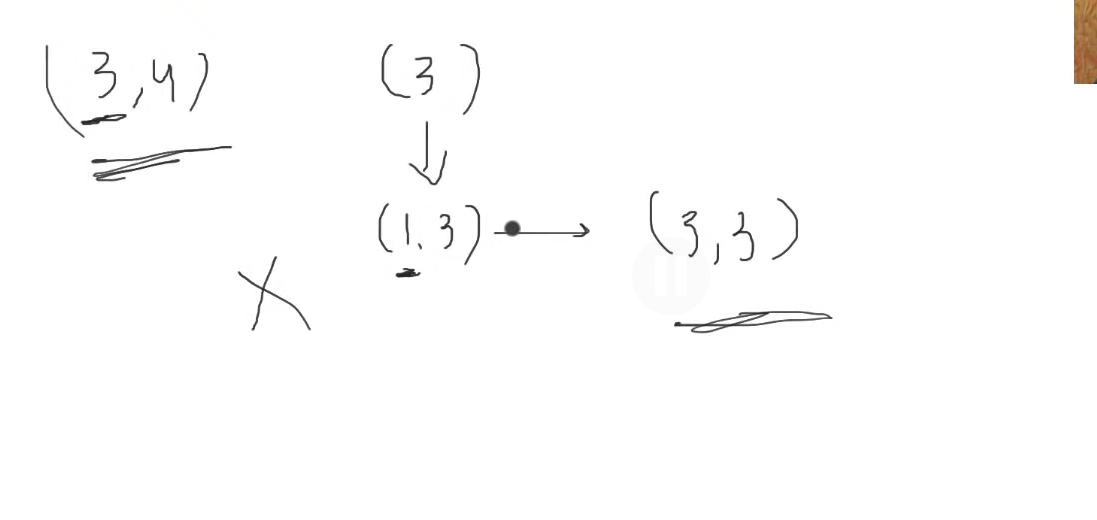

In [ ]:
a = np.arange(12).reshape(3,4)

b = np.arange(3)

print(a)

print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[0 1 2]


ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [ ]:
a = np.arange(3).reshape(1,3)
b = np.arange(3).reshape(3,1)

print(a)
print(b)

print(a+b)

[[0 1 2]]
[[0]
 [1]
 [2]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


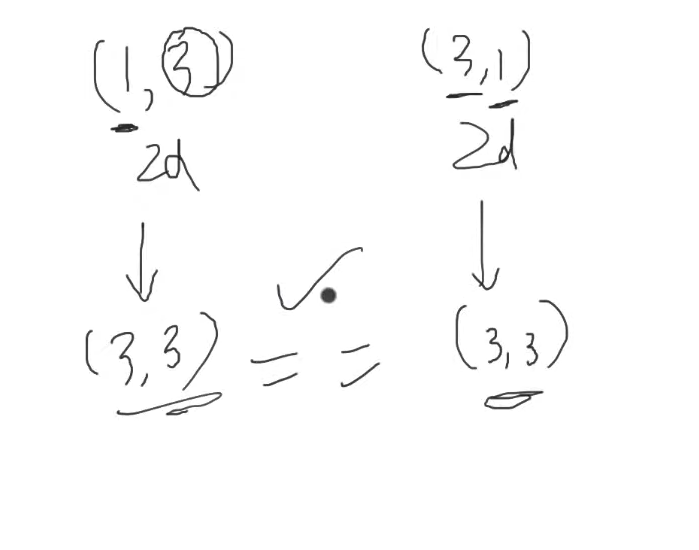

In [ ]:
a =  np.arange(3).reshape(1,3)
b =  np.arange(4).reshape(4,1)

print(a)
print(b)

print(a+b)

[[0 1 2]]
[[0]
 [1]
 [2]
 [3]]
[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]]


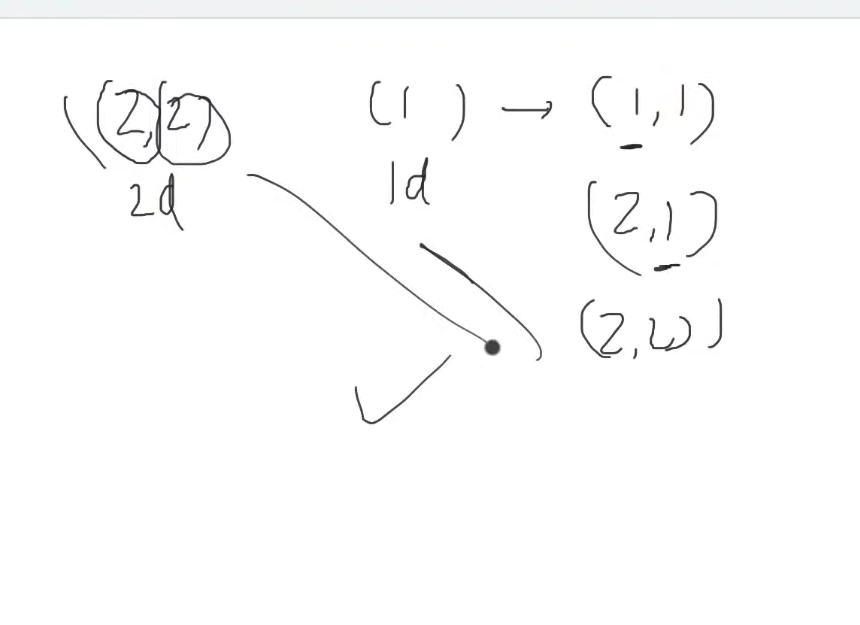

In [ ]:
a =  np.arange(4).reshape(2,2)
b =  np.arange(1).reshape(1,1)

print(a)
print(b)

print(a+b)

[[0 1]
 [2 3]]
[[0]]
[[0 1]
 [2 3]]


In [ ]:
a =  np.arange(12).reshape(3,4)
b =  np.arange(12).reshape(4,3)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


ValueError: operands could not be broadcast together with shapes (3,4) (4,3) 

In [ ]:
a =  np.arange(16).reshape(4,4)
b =  np.arange(4).reshape(2,2)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[0 1]
 [2 3]]


ValueError: operands could not be broadcast together with shapes (4,4) (2,2) 

#working with mathematical formulas

In [6]:
#sigmoid


def sigmoid(array):

  return 1/(1  + np.exp(-(array)))

a = np.arange(10)

sigmoid(a)

array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661])

In [7]:
# mean squared errors

actual = np.random.randint(1,50,25)
predicted = np.random.randint(1,50,25)

In [8]:
actual

array([11, 39, 30, 13, 41, 49, 49,  7, 35, 26, 36,  7, 13, 32, 10,  4, 21,
       36, 47, 40, 32, 40, 22, 33, 38])

In [9]:
predicted

array([18, 34, 15, 11, 15, 32,  7, 21, 11, 43, 17, 47, 15,  1, 18, 42, 31,
       17, 35, 32, 16,  8, 44, 36, 43])

In [13]:
def mean_square(actual,predicted):
    return np.mean((actual - predicted)**2)

mean_square(actual,predicted)

np.float64(439.76)

In [22]:
#binary cross entropy

y = np.random.randint(0,2,10)
p = np.random.randint(0,2,10)

p

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1])

In [23]:
def binary_cross_entropy(y, p):
    eps = 1e-15                     # to avoid log(0)
    p = np.clip(p, eps, 1 - eps)
    return -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))

binary_cross_entropy(y,p)

np.float64(17.26970803642742)

#Working with missing values

In [28]:
#working with missing values -> np.nan

a = np.array([1,2,3,4,np.nan,5])
a

array([ 1.,  2.,  3.,  4., nan,  5.])

In [29]:
np.isnan(a)

array([False, False, False, False,  True, False])

In [32]:
a[~np.isnan(a)]

array([1., 2., 3., 4., 5.])

#Plotting Graphs

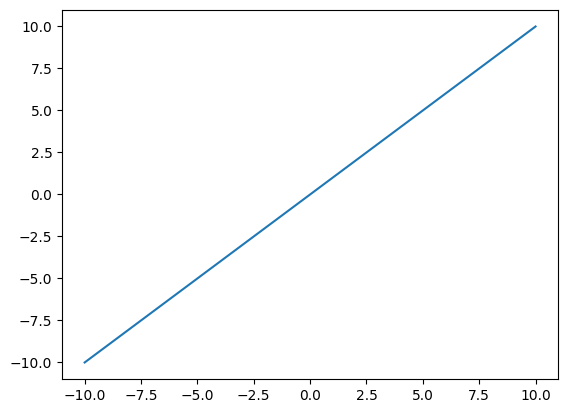

In [34]:
#plotting a 2d graph
#x = y

import matplotlib.pyplot as plt

x = np.linspace(-10,10,100)
y = x

plt.plot(x,y)

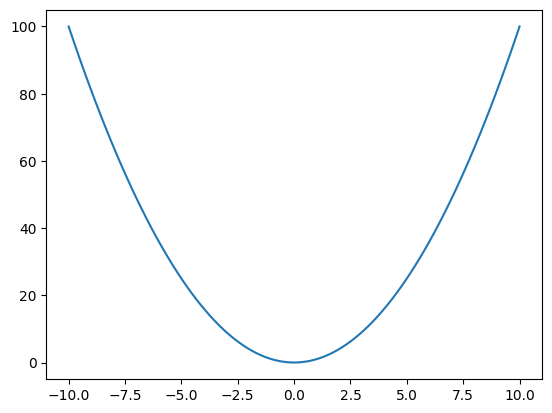

In [35]:
# y = x ^^2

x = np.linspace(-10,10,100)
y = x**2

plt.plot(x,y)

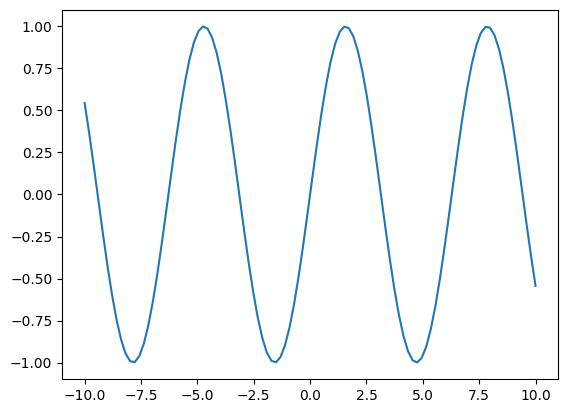

In [37]:
# y = sin(x)

x = np.linspace(-10,10,100)
y = np.sin(x)

plt.plot(x,y)

/tmp/ipython-input-1206569006.py:4: RuntimeWarning: invalid value encountered in log
  y = x * np.log(x)


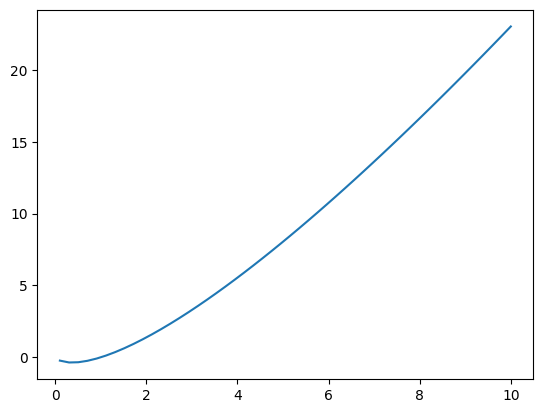

In [42]:
# y = x.log(x)

x = np.linspace(-10,10,100)
y = x * np.log(x)


plt.plot(x,y)

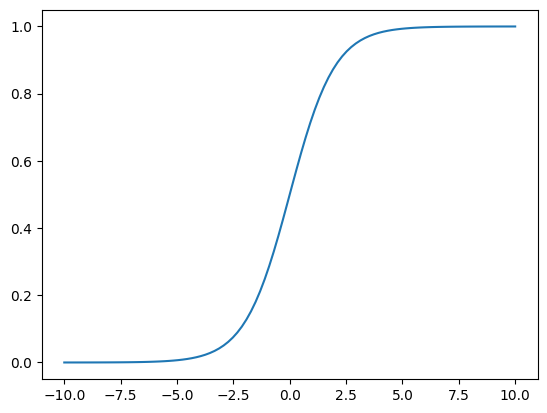

In [45]:
#plotting a scatter plot

x = np.linspace(-10,10,100)

y = 1/ (1 + np.exp(-(x)))

plt.plot(x,y)